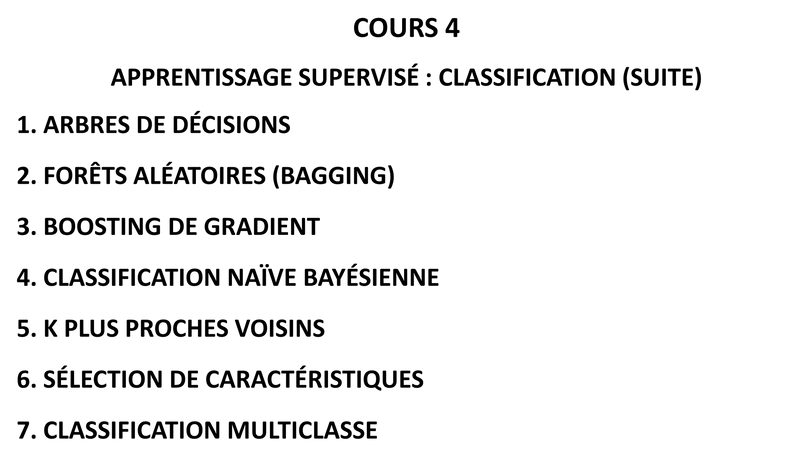

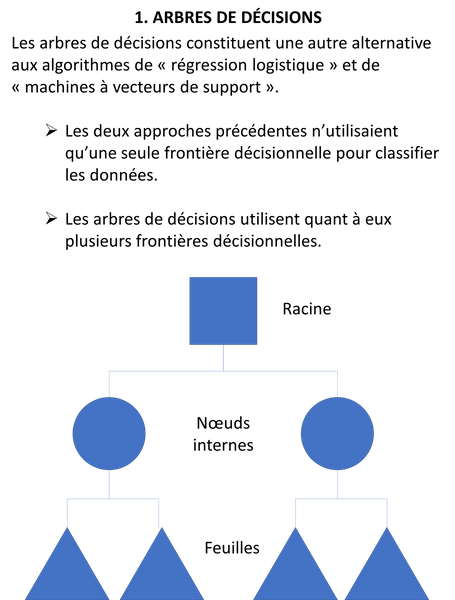

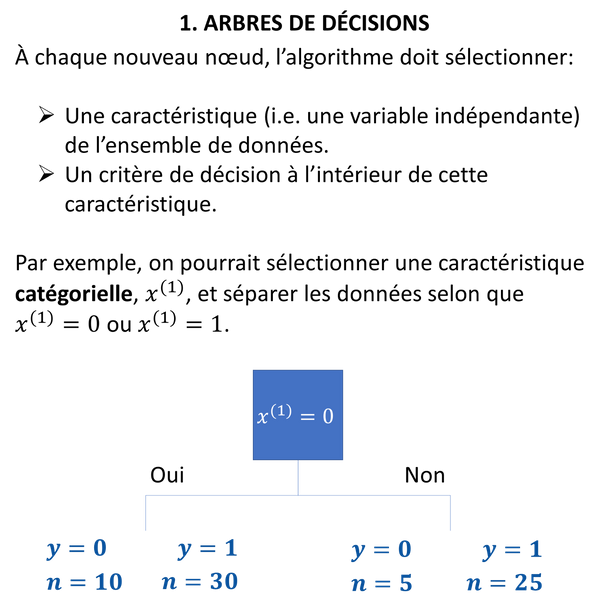

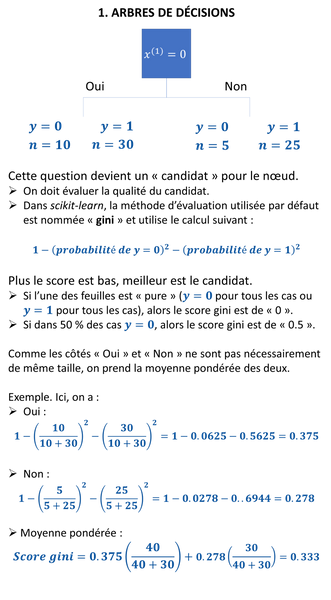

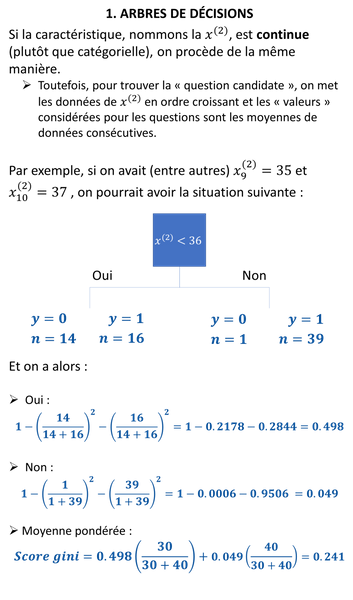

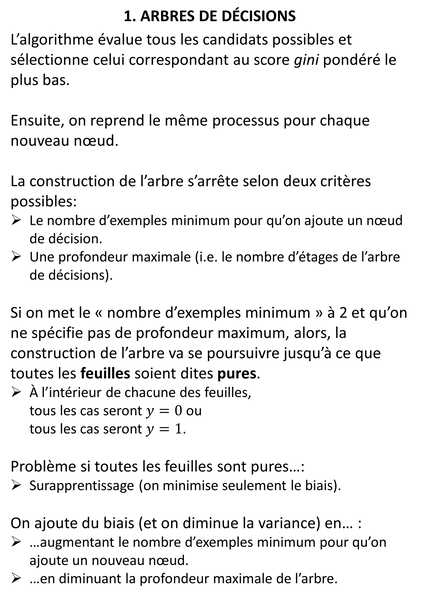

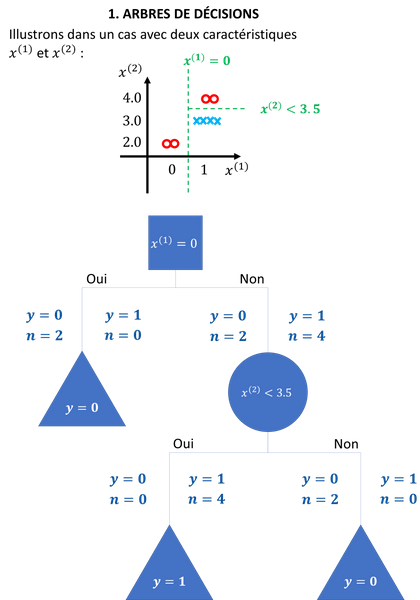

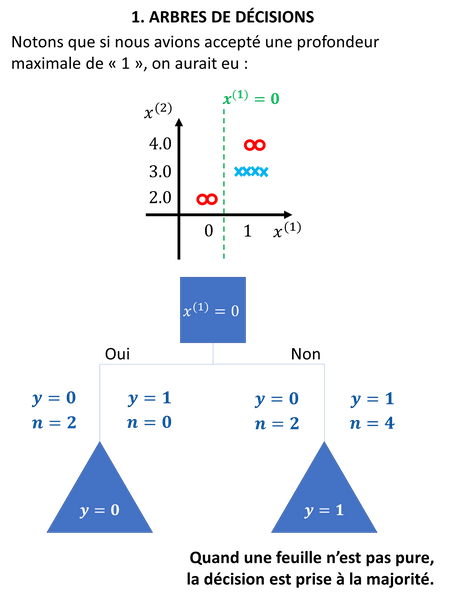

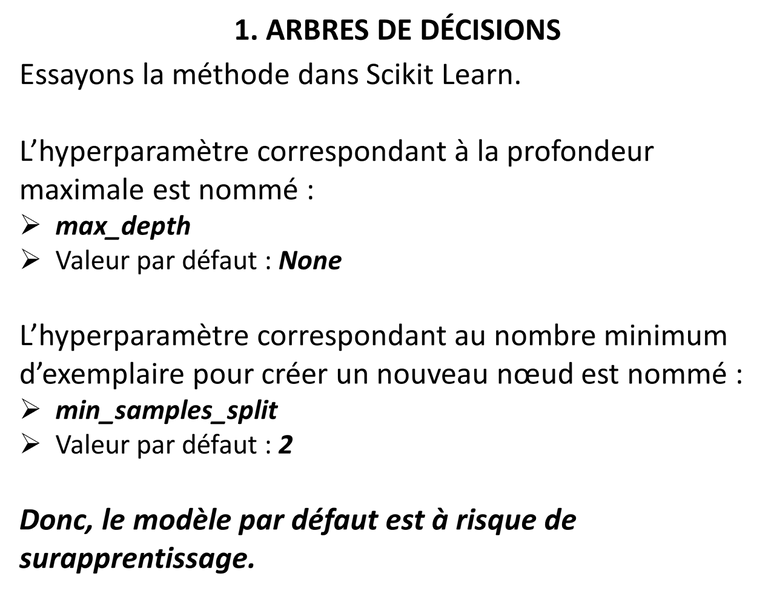

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = DecisionTreeClassifier()

# Définir les hyperparamètres
hyperparams = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'max_depth': 4, 'min_samples_split': 10}

Score = 
 0.7270538693786748


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [2]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)

# On construit une image d'un arbre de décisions
tree.export_graphviz(
            model,
            out_file = './img/_tree.dot',
            feature_names = features_cols,
            class_names = target_col,
            filled = True,
            rounded = True)


Test AUC =  0.6262553802008608


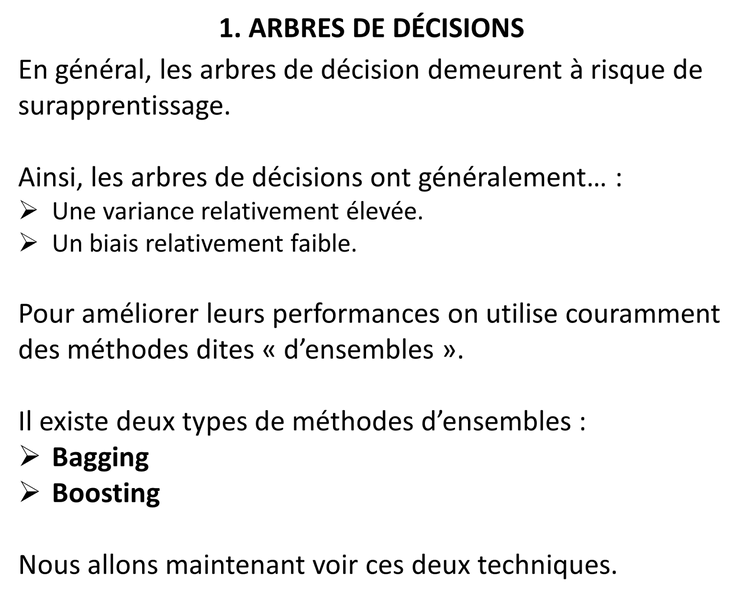

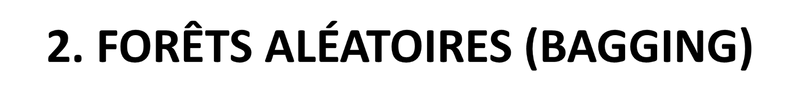

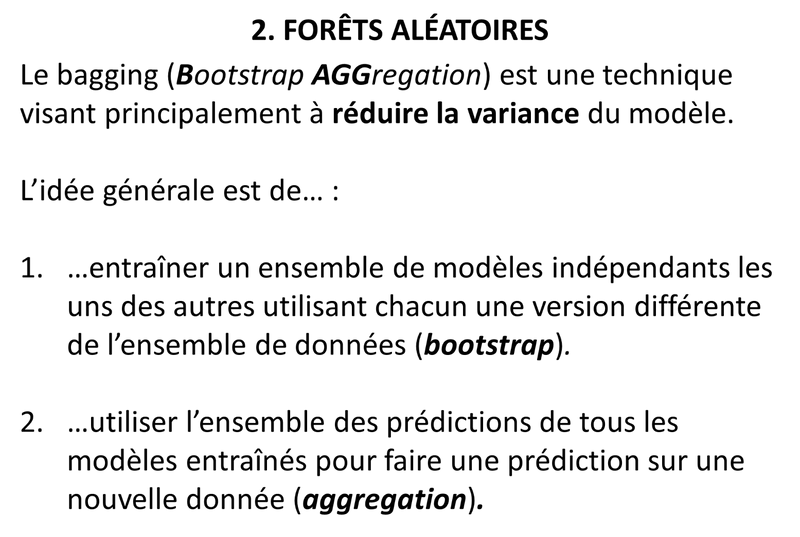

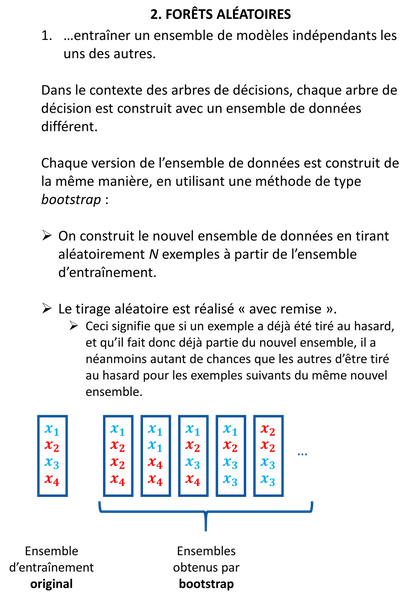

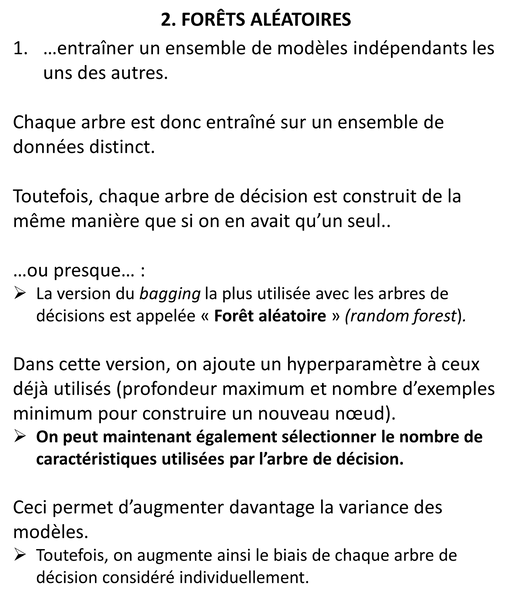

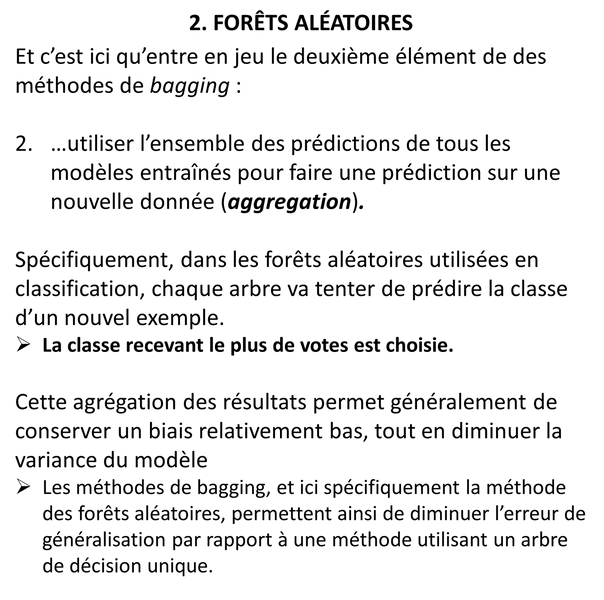

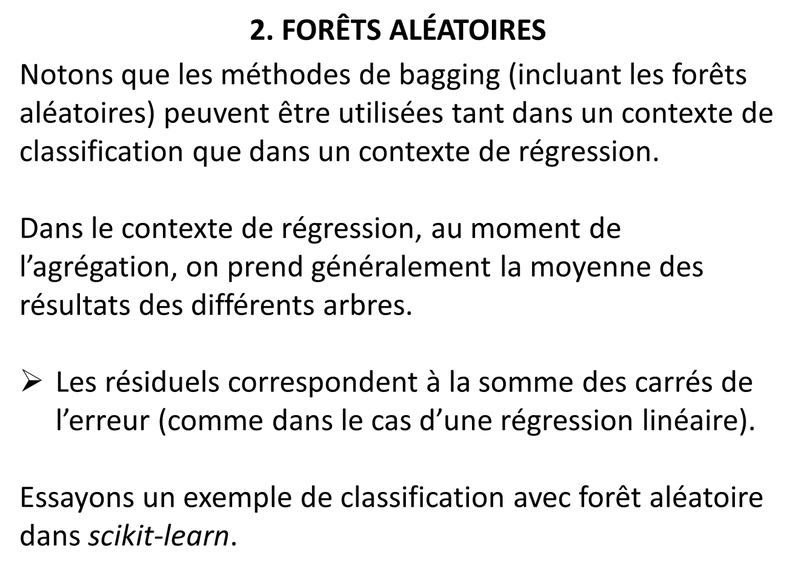

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = RandomForestClassifier()

# Définir les hyperparamètres
hyperparams = {'n_estimators':[5], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'max_depth': 4, 'max_features': 7, 'min_samples_split': 2, 'n_estimators': 5}

Score = 
 0.7453678690608613


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)

# On construit une image d'un arbre de décisions
tree.export_graphviz(
            model[0],
            out_file = './img/_tree.dot',
            feature_names = features_cols,
            class_names = target_col,
            filled = True,
            rounded = True)


Test AUC =  0.68974175035868


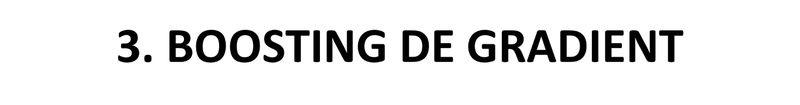

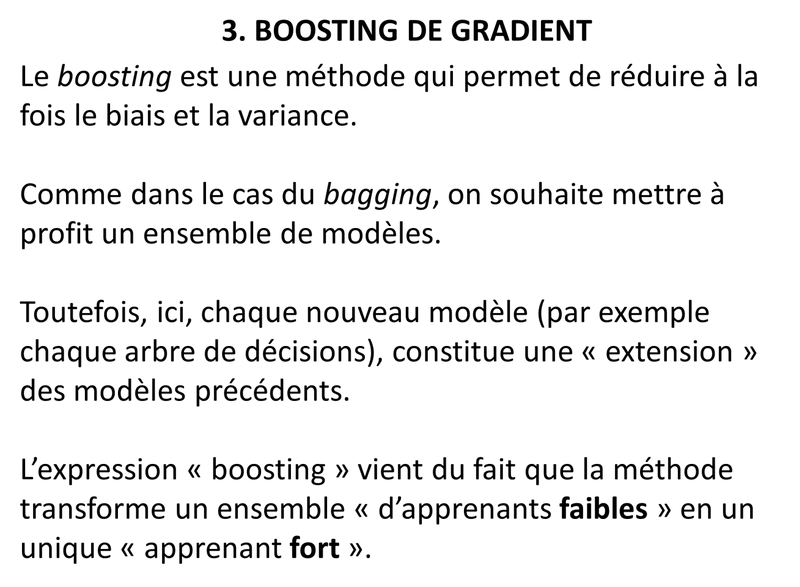

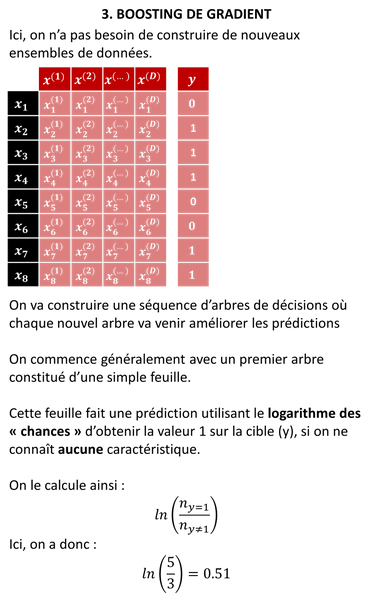

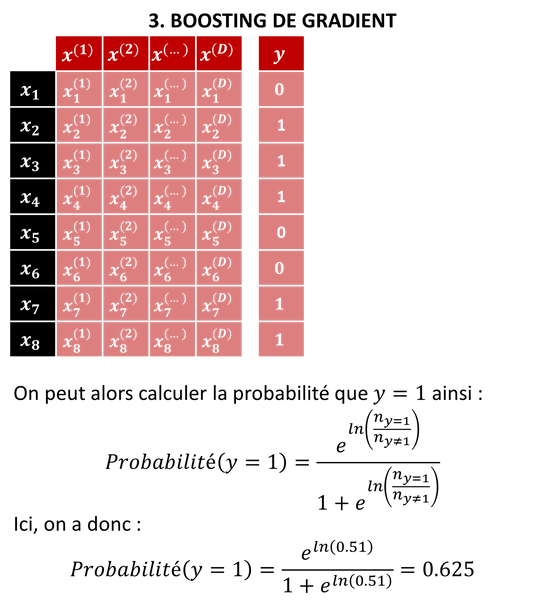

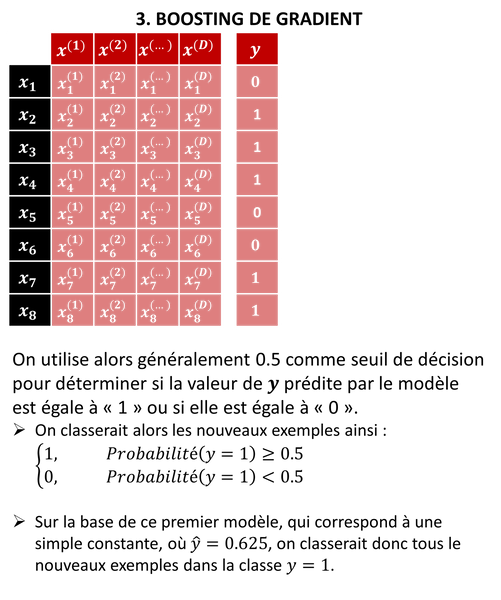

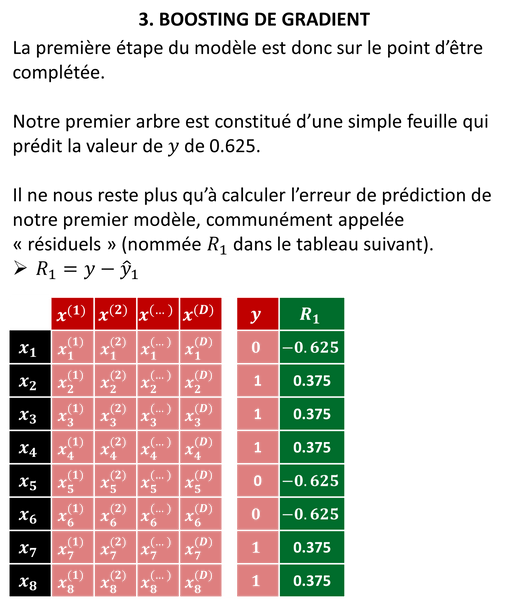

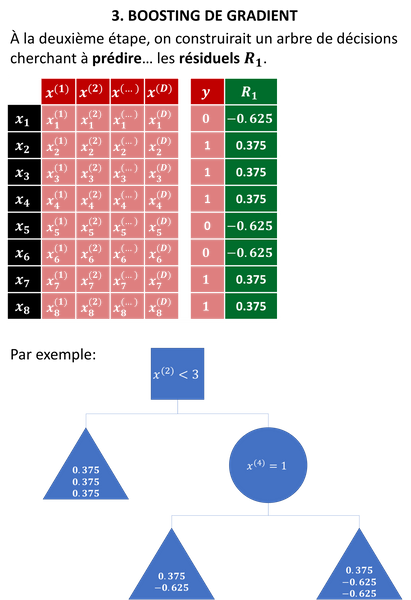

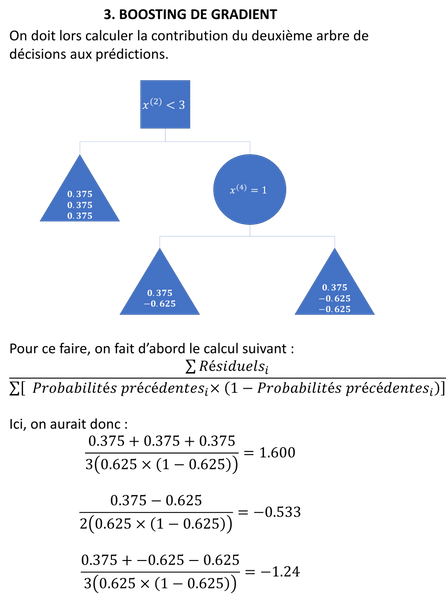

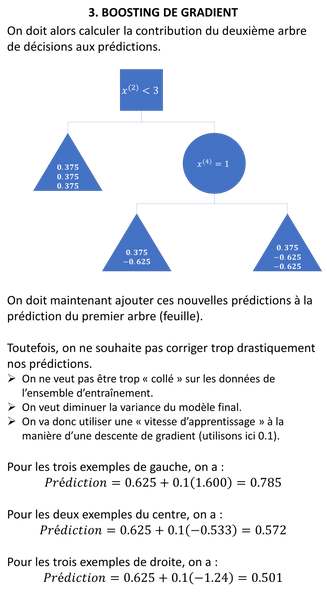

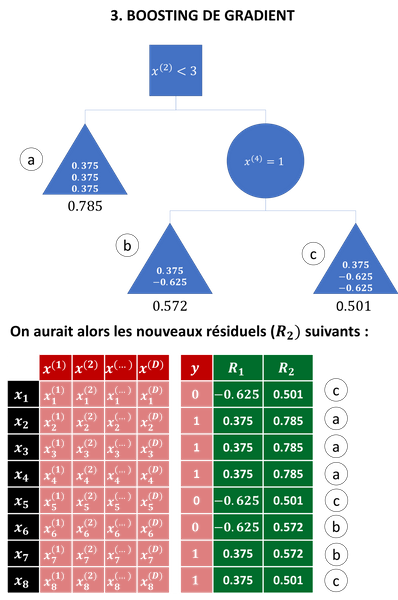

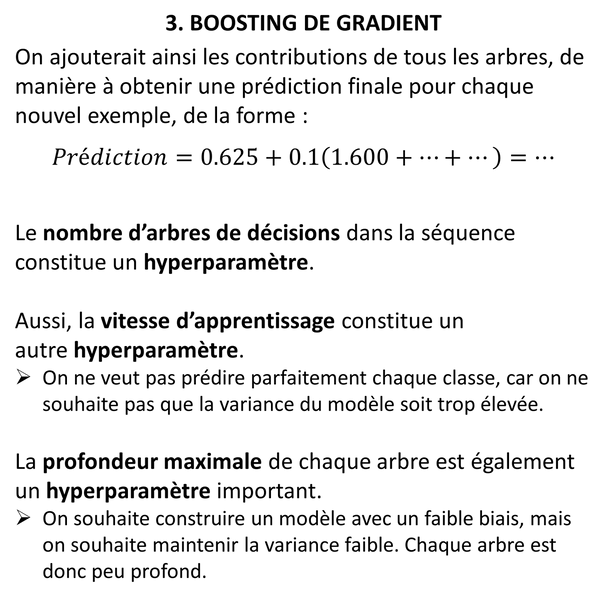

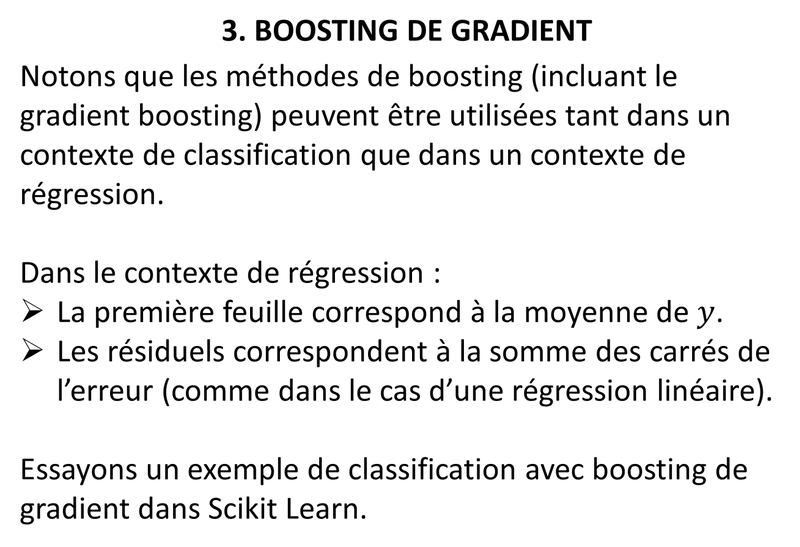

In [5]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = GradientBoostingClassifier()

# Définir les hyperparamètres
hyperparams = {'learning_rate':[0.1, 0.2, 0.4, 0.8], \
                      'n_estimators':[5], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 5}

Score = 
 0.7540402034006038


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=5,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)

# On construit une image d'un arbre de décisions
tree.export_graphviz(
            model[1, 0],
            out_file = './img/_tree.dot',
            feature_names = features_cols,
            class_names = target_col,
            filled = True,
            rounded = True)


Test AUC =  0.665351506456241


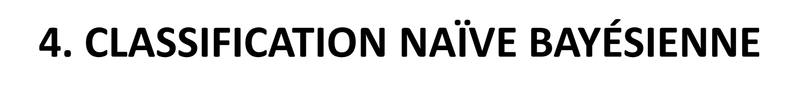

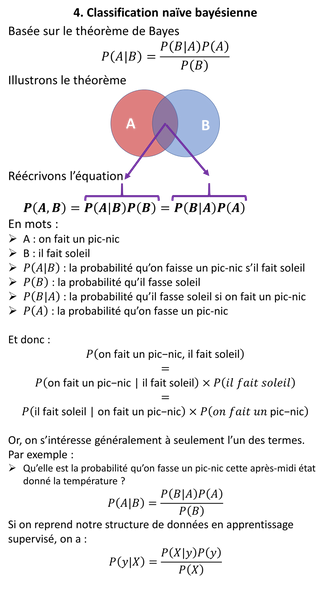

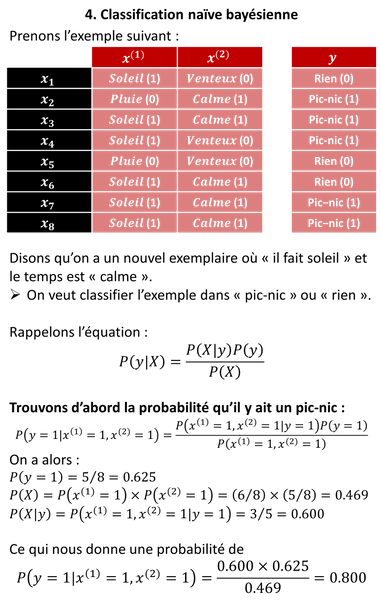

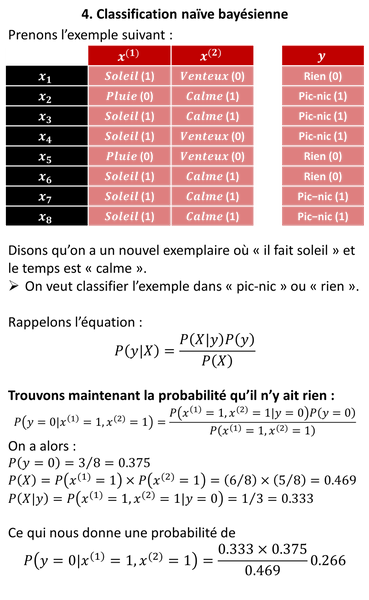

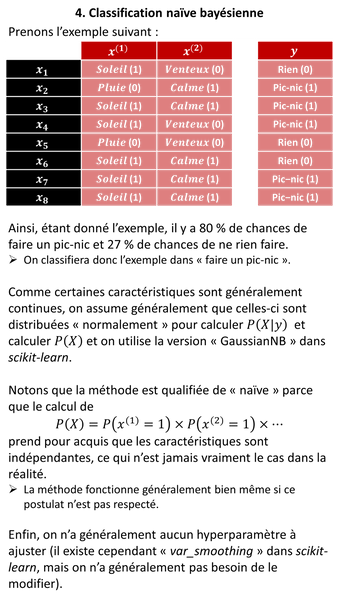

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.naive_bayes import GaussianNB

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = GaussianNB()

# Définir les hyperparamètres
hyperparams = {'var_smoothing':[1e-8, 1e-9, 1e-10]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready


ValueError: Invalid parameter var_smoothing for estimator GaussianNB(priors=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [8]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.5893113342898135


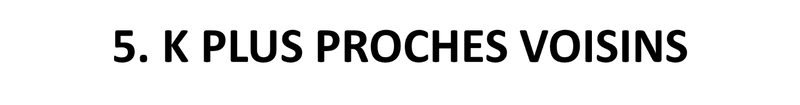

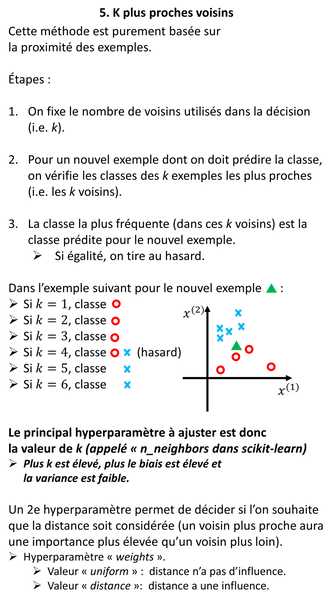

In [9]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = KNeighborsClassifier()

# Définir les hyperparamètres
hyperparams = {'n_neighbors':[1, 2, 4, 8, 16], 'weights':['uniform', 'distance']}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'n_neighbors': 16, 'weights': 'distance'}

Score = 
 0.6926744001271252


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='distance')

In [10]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.706599713055954


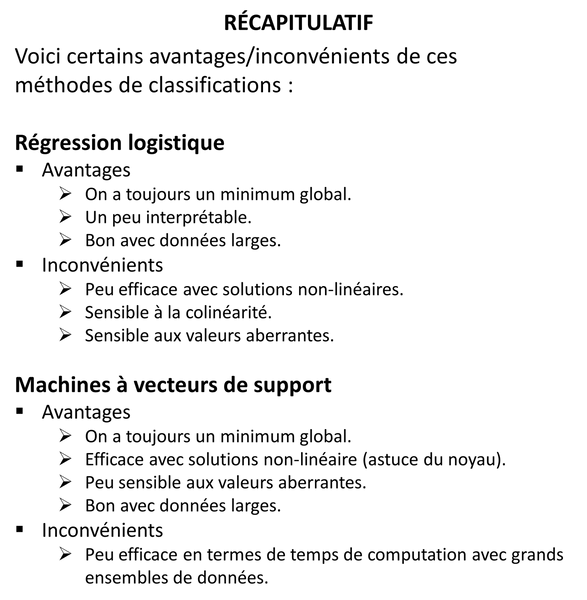

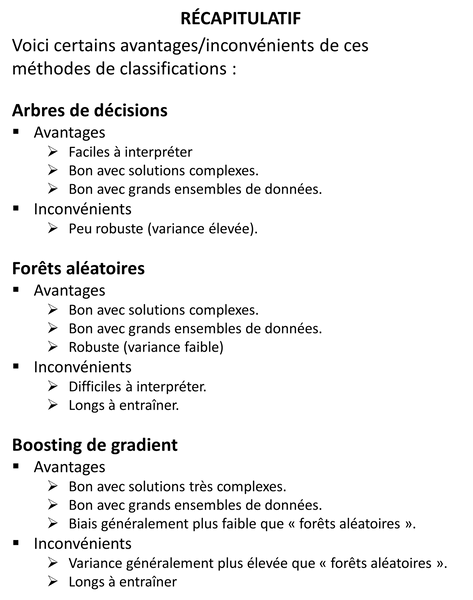

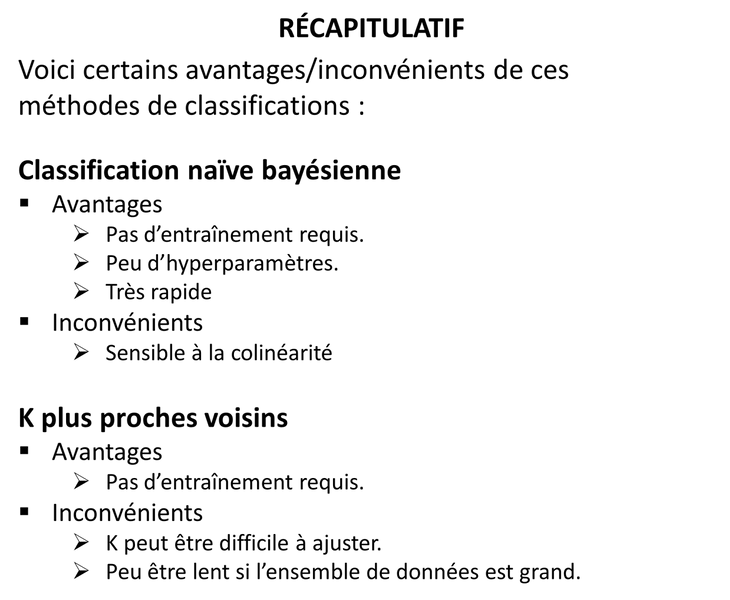

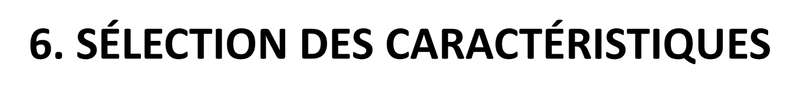

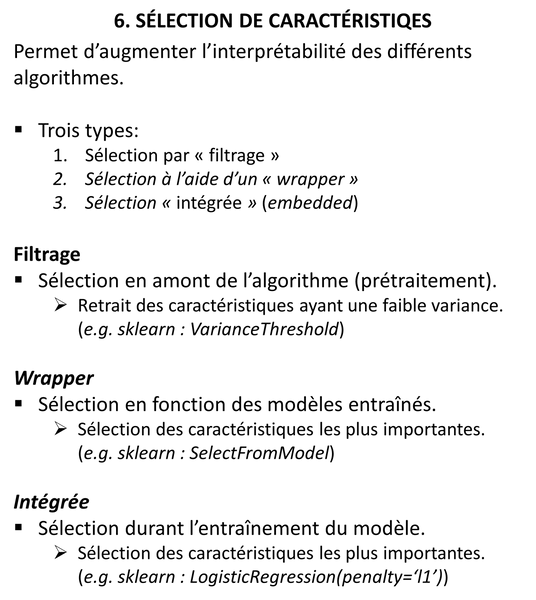

### ***EXEMPLE "FILTRAGE"***

In [11]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de sélection de données
from sklearn.feature_selection import VarianceThreshold

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


print(X_train.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_train)
sel.fit_transform(X_test)
print(X_train.shape)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = DecisionTreeClassifier()

# Définir les hyperparamètres
hyperparams = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

(297, 9)
(297, 9)
Data ready

Meilleurs hyperparamètres: 
 {'max_depth': 4, 'min_samples_split': 10}

Score = 
 0.7270538693786748


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.6262553802008608


### ***EXEMPLE "WRAPPER"***

In [13]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction de sélection de données
from sklearn.feature_selection import VarianceThreshold, SelectFromModel

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Noms des colonnes correspondant aux caractéristiques et à la cible
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']
target_col = 'WHODASTTB'

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


print(X_train.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X_train)
sel.fit_transform(X_test)
print(X_train.shape)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model = DecisionTreeClassifier()

# Définir les hyperparamètres
hyperparams = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser une première itération de la validation croisée avec grille de recherche pour les hyperparamètres.
print('\n\nITÉRATION 1\n')
print('\nNombre de caractéristiques :\n', X_train.shape[1])
# Réaliser une validation croisée avec grille de recherche pour les hyperparamètres
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)
print('\nImportance des caractéristiques : \n', model.feature_importances_)

print(X_train.shape)
# Sélectionner les caractéristiques les plus importantes
features_new = SelectFromModel(model, threshold=0.1, prefit=True, max_features=3)
X_train = features_new.transform(X_train)
X_test = features_new.transform(X_test)
print(X_train.shape)

# Réaliser une deuxième itération de la validation croisée avec grille de recherche pour les hyperparamètres.
print('\n\nITÉRATION 2\n')
print('\nNombre de caractéristiques :\n', X_train.shape[1])
# Réaliser une nouvelle validation croisée avec grille de recherche pour les hyperparamètres
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)
print('\nImportance des caractéristiques : \n', model.feature_importances_)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

(297, 9)
(297, 9)
Data ready


ITÉRATION 1


Nombre de caractéristiques :
 9

Meilleurs hyperparamètres: 
 {'max_depth': 4, 'min_samples_split': 10}

Score = 
 0.7270538693786748

Importance des caractéristiques : 
 [0.0255661  0.52284761 0.         0.04807339 0.11804509 0.1492882
 0.1361796  0.         0.        ]
(297, 9)
(297, 3)


ITÉRATION 2


Nombre de caractéristiques :
 3

Meilleurs hyperparamètres: 
 {'max_depth': 2, 'min_samples_split': 2}

Score = 
 0.7329334180835849

Importance des caractéristiques : 
 [0.86004273 0.13995727 0.        ]


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.6603299856527978


### ***EXEMPLE "INTÉGRÉE"***

In [15]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

# Importer les librairies utiles pour l'analyse
import pandas as pd
import numpy as np


# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import roc_auc_score

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
data = data.dropna()

# Colonnes correspondant à des caractéristiques
features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

# Données importées (X: caractéristiques, y: cible)
X = data.loc[:, features_cols]
y = data['WHODASTTB']

# Séparation en données d'entraînement et en données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Standatdisation des entrées
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
#model = LogisticRegression()
model = LogisticRegression(penalty='l1')

# Définir les hyperparamètres
hyperparams = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]}

# Définir les plus de la validation croisée
cv_folds = StratifiedKFold(n_splits=5, random_state=42)

# Définir le type de score utilisé pour sélectionner les hyperparamètres dans la validation croisée
scoring='roc_auc'

# Réaliser la validation croisée avec grille de recherche pour les hyperparamètres.
cv_valid = GridSearchCV(estimator=model, param_grid=hyperparams, cv=cv_folds, scoring=scoring, iid=False)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
model = cv_valid.best_estimator_
print('\nMeilleurs hyperparamètres: \n', best_params)
print('\nScore = \n', best_score)
print('\nImportance des caractéristiques : \n', model.coef_)

# Entraîner le modèle final avec toutes les données d'entraînement
model.fit(X_train,y_train)

Data ready

Meilleurs hyperparamètres: 
 {'C': 0.1}

Score = 
 0.7475011918004131

Importance des caractéristiques : 
 [[0.         0.80137513 0.         0.         0.         0.00362856
  0.         0.         0.        ]]


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# On teste l'algorithme final en prédisant de nouvelles données.
y_pred = model.predict(X_test)

# On évalue les prédictions de l'algorithme final.
auc = roc_auc_score(y_test, y_pred)

# On affiche le résultat
print('\nTest AUC = ', auc)


Test AUC =  0.6406025824964132


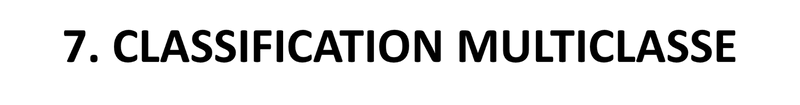

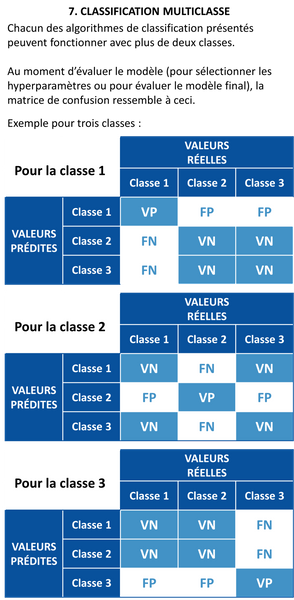

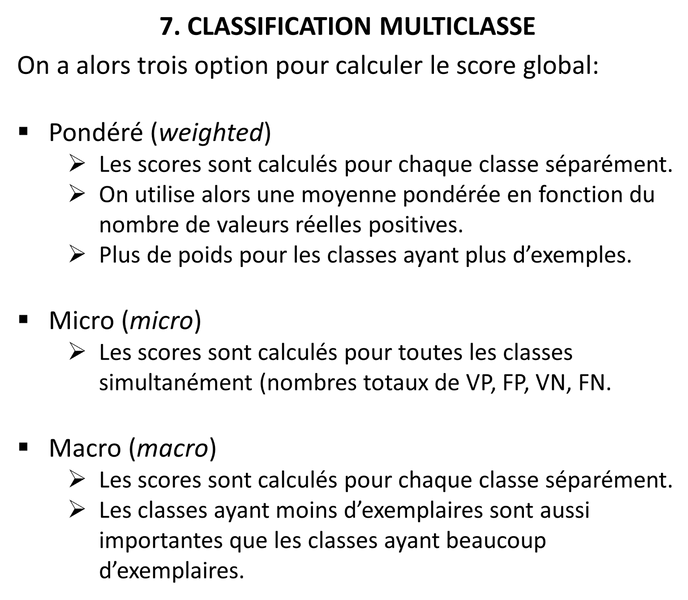

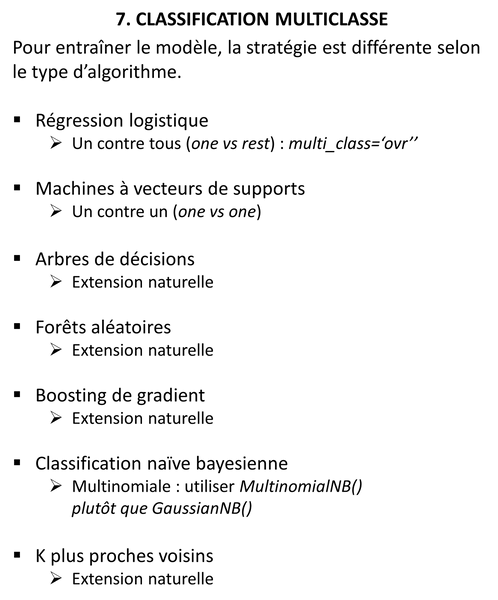

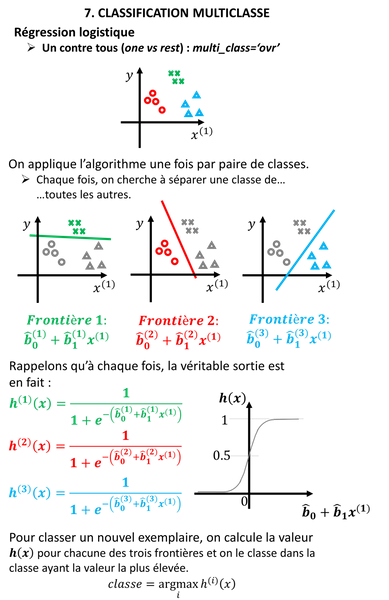

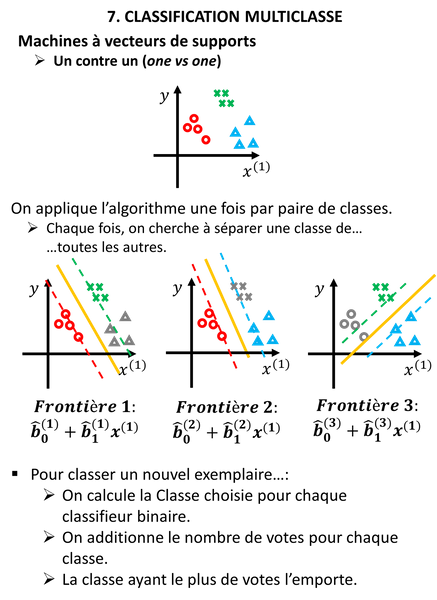

In [17]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# -----------------------------------------------------------------------------
# ÉTAPE 1 : importer les librairies utiles
# -----------------------------------------------------------------------------

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------------
# ÉTAPE 2 : importer les fonctions utiles
# -----------------------------------------------------------------------------

# Importer les fonctions de prétraitement
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importer une fonction qui nous permette de construire aléatoirement les ensembles "Entraînement" et "Test"
from sklearn.model_selection import train_test_split

# Importer le modèle de régression logistique de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Importer la fonction de validation croisée
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Importer la fonction permettant d'afficher le rapport de classification
from sklearn.metrics import f1_score, make_scorer

np.random.seed(42)

# -----------------------------------------------------------------------------
# ÉTAPE 3 : importer et préparer le jeu de données 
# -----------------------------------------------------------------------------

# Importons un ensemble de données
data = pd.read_csv('../data/sim_data_signature_small.csv')
# Retirer les lignes comportant des données manquantes
data = data.dropna()
# Retirer les sujets contrôles
data[data.CONTROL != 1]

features_cols = ['PSQ_SS', 'PHQ9TT', 'CEVQOTT', 'DAST10TT', 'AUDITTT', 'STAIYTT', 'AGE', 'SEXE', 'SES']

X = data.loc[:, features_cols]
y = data['CIMDX']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Data ready')

# -----------------------------------------------------------------------------
# ÉTAPE 4 : définir et entraîner le modèle
# -----------------------------------------------------------------------------

# Définir le modèle
model_logistic = LogisticRegression(multi_class='ovr')
model_linear = svm.SVC(kernel='linear')
model_rbf = svm.SVC(kernel='rbf')
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_boosting = GradientBoostingClassifier()
model_nb = MultinomialNB()
model_knn = KNeighborsClassifier()

# Définir les hyperparamètres
hyperparams_logistic = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_linear = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_rbf = {'C':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000], 'gamma':[.0001, .001, .01, .1, 1, 10, 100, 1000, 1000]}
hyperparams_tree = {'max_depth':[1, 2, 4, 8, 12, 16], 'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16]}
hyperparams_forest = {'n_estimators':[5], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_boosting = {'learning_rate':[0.1, 0.2, 0.4, 0.8], \
                      'n_estimators':[5], \
                      'max_depth':[1, 2, 4, 8, 12, 16], \
                      'min_samples_split':[2, 4, 6, 8, 10, 12, 14, 16], \
                      'max_features': [1, 3, 5, 7, 9]}
hyperparams_nb = {'alpha':[1]}
hyperparams_knn = {'n_neighbors':[1, 2, 4, 8, 16], 'weights':['uniform', 'distance']}


cv_folds = StratifiedKFold(n_splits=3, random_state=42)

scoring = make_scorer(f1_score , average='macro')

cv_valid = GridSearchCV(estimator=model_logistic, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nlogistic')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_linear, param_grid=hyperparams_linear, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_linear')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_rbf, param_grid=hyperparams_rbf, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nSVC_rbf')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_tree, param_grid=hyperparams_tree, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\ntree')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_forest, param_grid=hyperparams_forest, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nforest')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_boosting, param_grid=hyperparams_boosting, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nboosting')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_nb, param_grid=hyperparams_nb, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nnaive bayes')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

cv_valid = GridSearchCV(estimator=model_knn, param_grid=hyperparams_knn, cv=cv_folds, scoring=scoring)
cv_valid.fit(X_train, y_train)
best_params = cv_valid.best_params_
best_score = cv_valid.best_score_
print('\nknn')
print('\nMeilleur paramètre: ', best_params)
print('\nScore = ', best_score)

print("\n\n Analyse terminée")

Data ready

logistic

Meilleur paramètre:  {'C': 1000}

Score =  0.272270737503952

SVC_linear

Meilleur paramètre:  {'C': 10}

Score =  0.27650306407984937

SVC_rbf

Meilleur paramètre:  {'C': 1000, 'gamma': 1}

Score =  0.3809556829162604

tree

Meilleur paramètre:  {'max_depth': 12, 'min_samples_split': 6}

Score =  0.28160113589197633

forest

Meilleur paramètre:  {'max_depth': 8, 'max_features': 9, 'min_samples_split': 2, 'n_estimators': 5}

Score =  0.36359885148800425

boosting

Meilleur paramètre:  {'learning_rate': 0.8, 'max_depth': 8, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 5}

Score =  0.4012201909204111

naive bayes

Meilleur paramètre:  {'alpha': 1}

Score =  0.20031841689265756

knn

Meilleur paramètre:  {'n_neighbors': 1, 'weights': 'uniform'}

Score =  0.43204561551884185


 Analyse terminée
